In [1]:
import tensorflow as tensor

In [2]:
##Reading the database file

In [3]:
def Read_Database(datafile):
    database = []
    data_rows= datafile.readlines()

    for i, data_row in enumerate(data_rows):
        data_row = data_row.split(',')
        data_row[8] = data_row[8].strip()
        database.append(data_row)
        
    return database

In [4]:
datafile= open('database.txt')
database = Read_Database(datafile)

In [5]:
##Forming the dataframe

In [6]:
import pandas as pd

In [7]:
data_types = ['process', 'letter', 'time', 'roll', 'pitch', 'yaw', 'x-distance', 'y-distance', 'z-distance']
database = pd.DataFrame(data = database, columns = data_types)
database.head()

,process,letter,time,roll,pitch,yaw,x-distance,y-distance,z-distance
0,Letter,A,3.761497,-49.893414,27.192217,-4.095078,-0.028583,-0.073575,0.016961
1,Letter,A,3.761497,-49.893414,27.192217,-4.095078,-0.028583,-0.073575,0.016961
2,Letter,A,3.787497,-57.877670,29.199154,-11.091557,-0.080323,-0.173671,0.077316
3,Letter,A,3.813497,-65.435219,31.655851,-20.754364,-0.112852,-0.262297,0.097649
4,Letter,A,3.813497,-65.435219,31.655851,-20.754364,-0.112852,-0.262297,0.097649


In [8]:
##Turning the roll-time-pitch-yaw-x_distance-y_distance-z_distance values into floats

In [9]:
database['roll'] = database['roll'].astype('float')
database['pitch'] = database['pitch'].astype('float')
database['yaw'] = database['yaw'].astype('float')
database['x-distance'] = database['x-distance'].astype('float')
database['y-distance'] = database['y-distance'].astype('float')
database['z-distance'] = database['z-distance'].astype('float')

In [10]:
letters = database['letter'].value_counts().index

In [11]:
##Plotting the values of every letter

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Fs = 50    #We get values every 20ms from the microcontroller

In [14]:
def plot_letters(letters, database):
    fig, (roll, pitch, yaw, x_distance, y_distance, z_distance) = plt.subplots(nrows=6, figsize=(16,8), sharex = True)
    plot_axis(roll, database['time'], database['roll'], 'Roll')
    plot_axis(pitch, database['time'], database['pitch'], 'Pitch')
    plot_axis(yaw, database['time'], database['yaw'], 'Yaw')
    plot_axis(x_distance, database['time'], database['x-distance'], 'X-Distance')
    plot_axis(y_distance, database['time'], database['y-distance'], 'Y-Distance')
    plot_axis(z_distance, database['time'], database['z-distance'], 'Z-Distance')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(letter)
    plt.show()
    
def plot_axis(value, x, y, title):
    value.plot(x, y, 'b')
    value.set_title(title)
    value.xaxis.set_visible(False)
    value.set_ylim([min(y) - np.std(y), max(y)+np.std(y)])
    value.set_xlim([min(x), max(x)])
    value.grid(True)

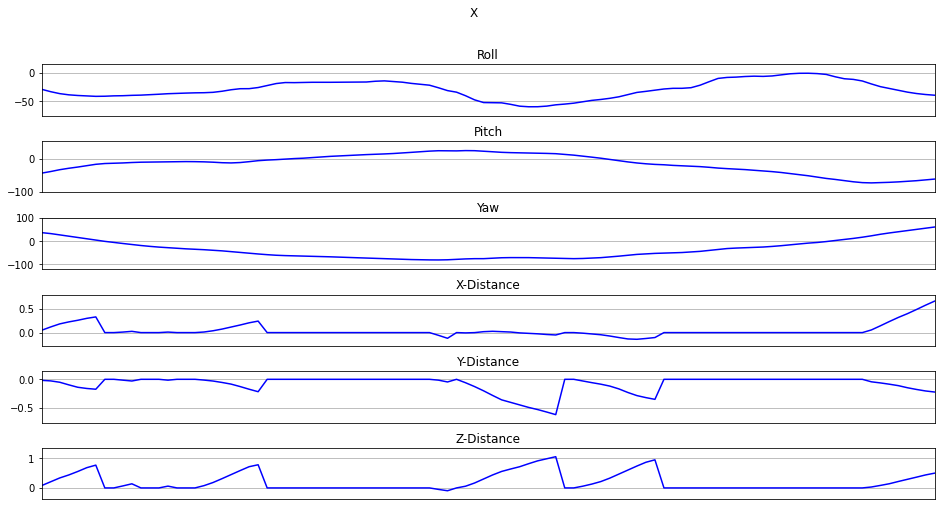

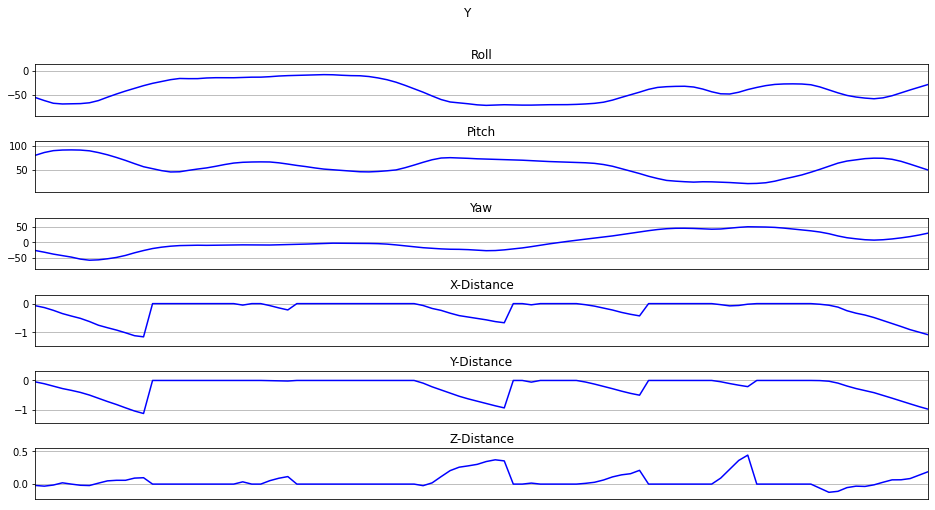

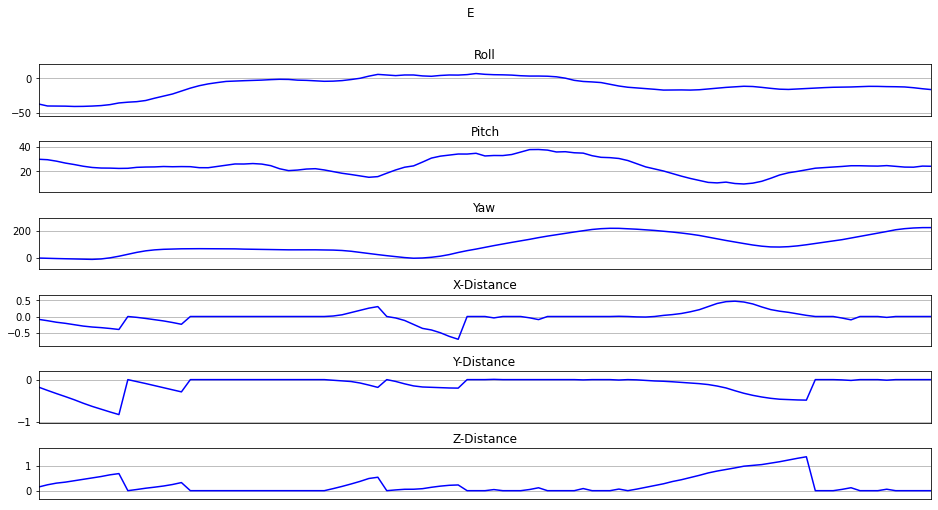

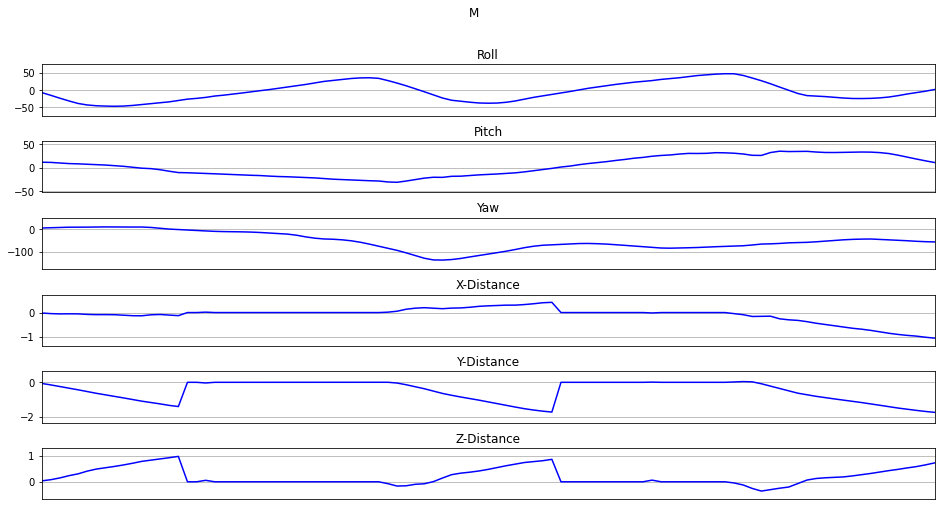

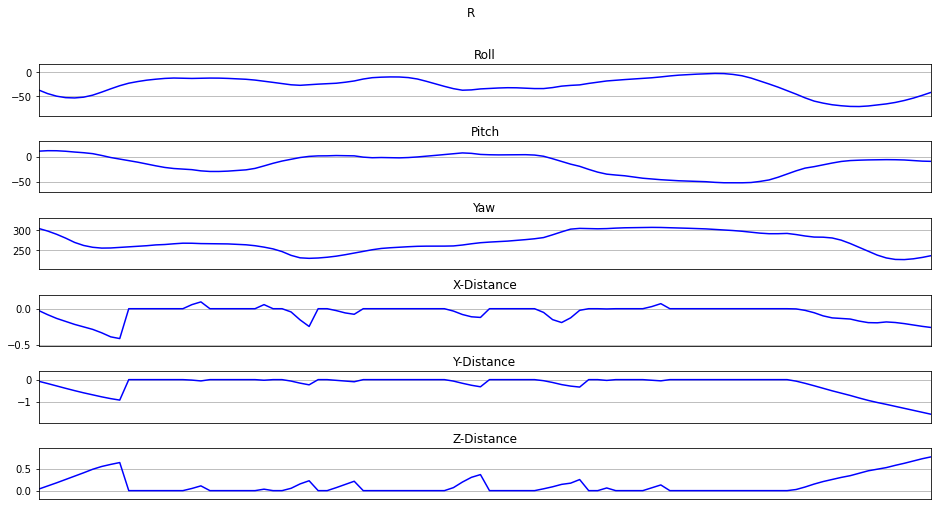

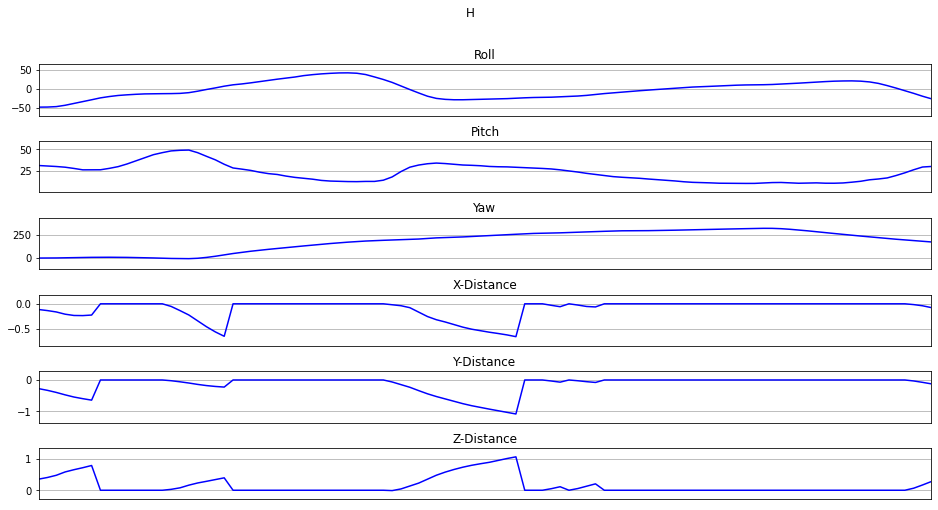

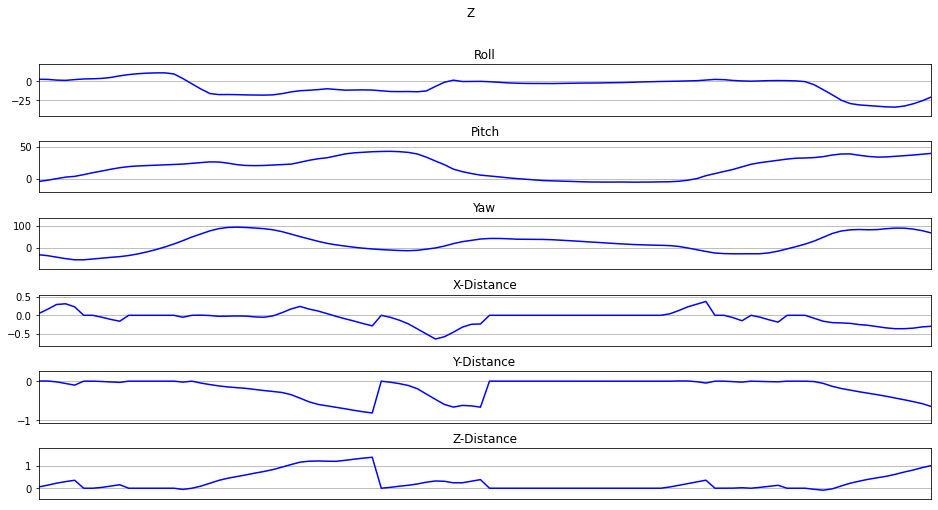

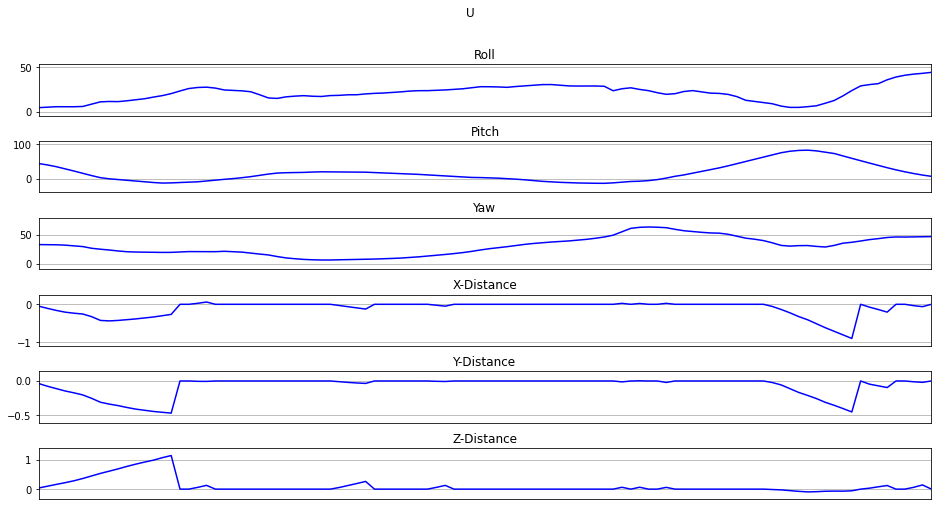

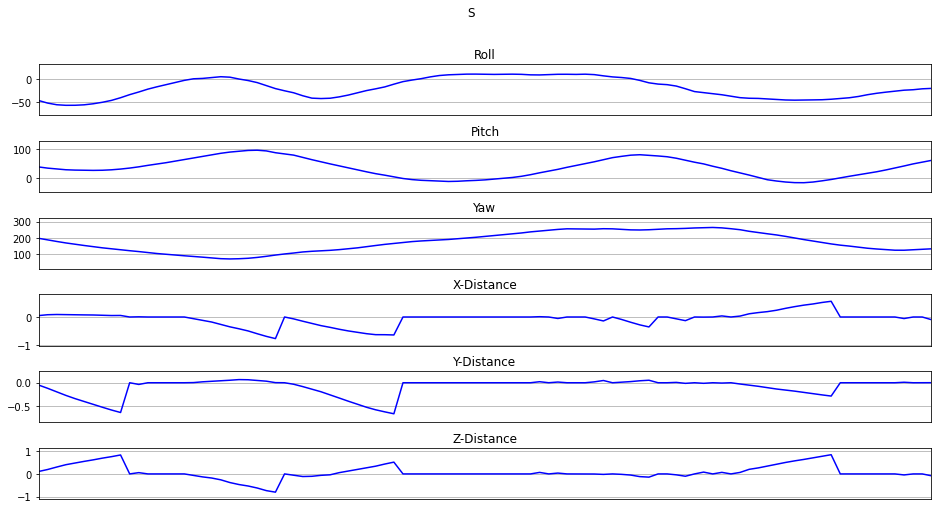

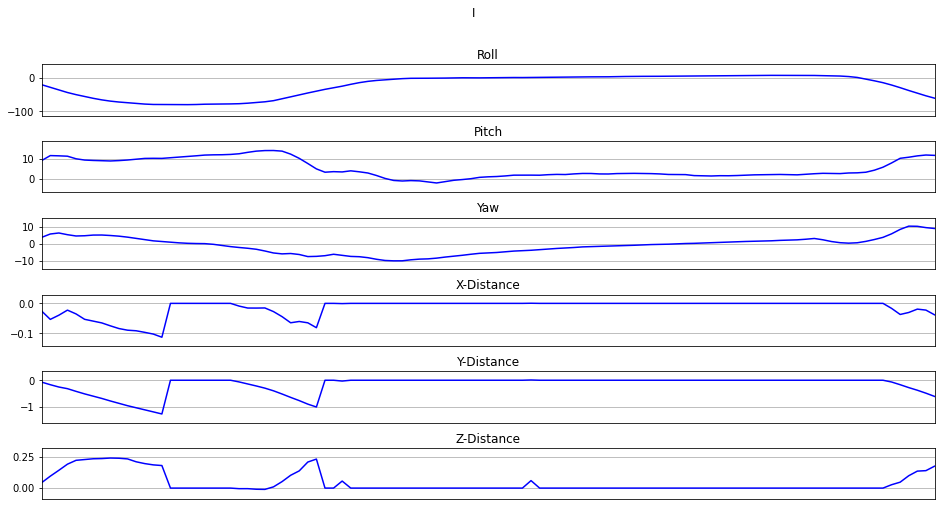

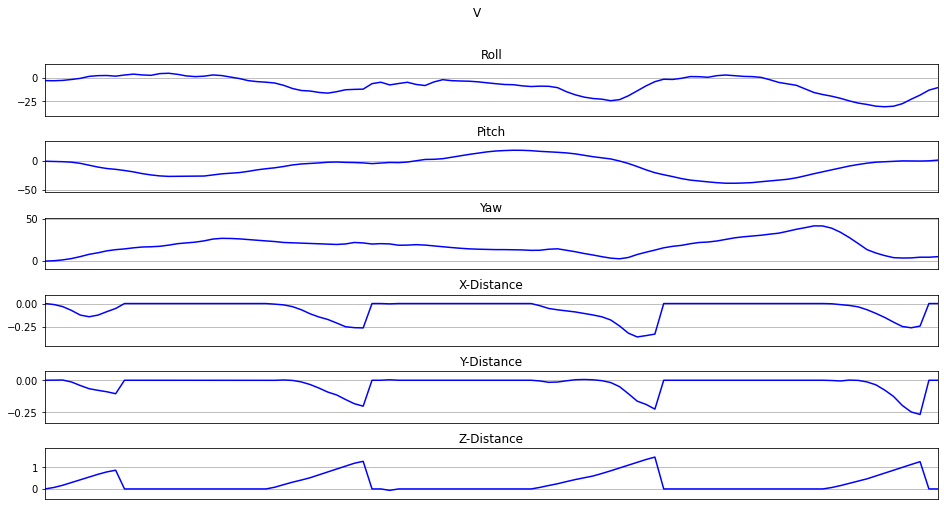

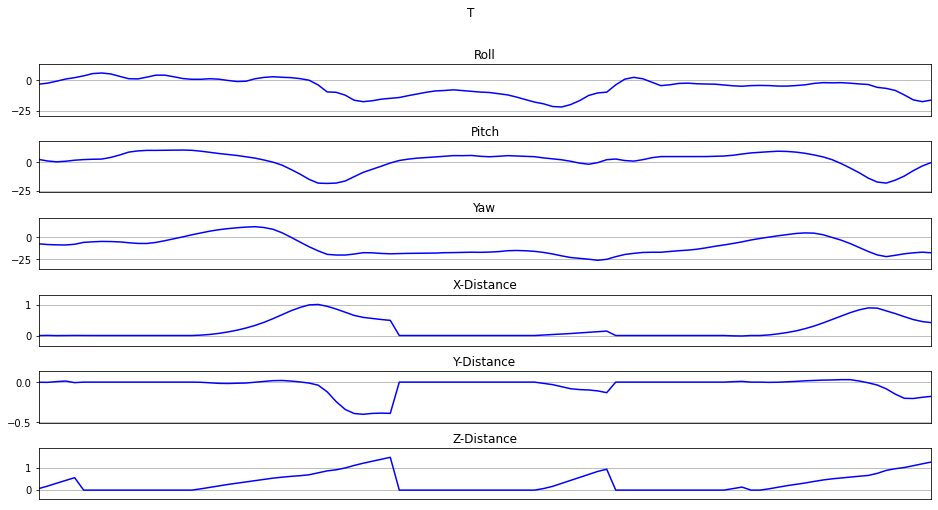

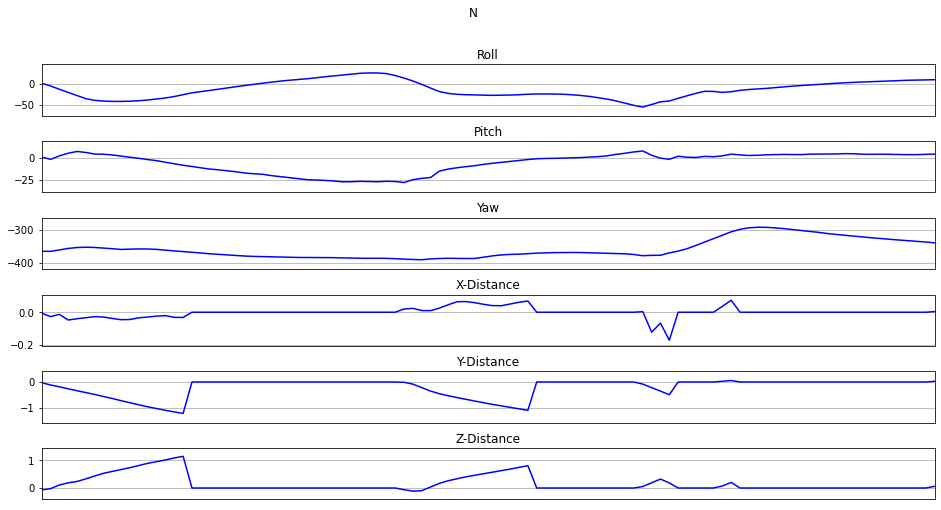

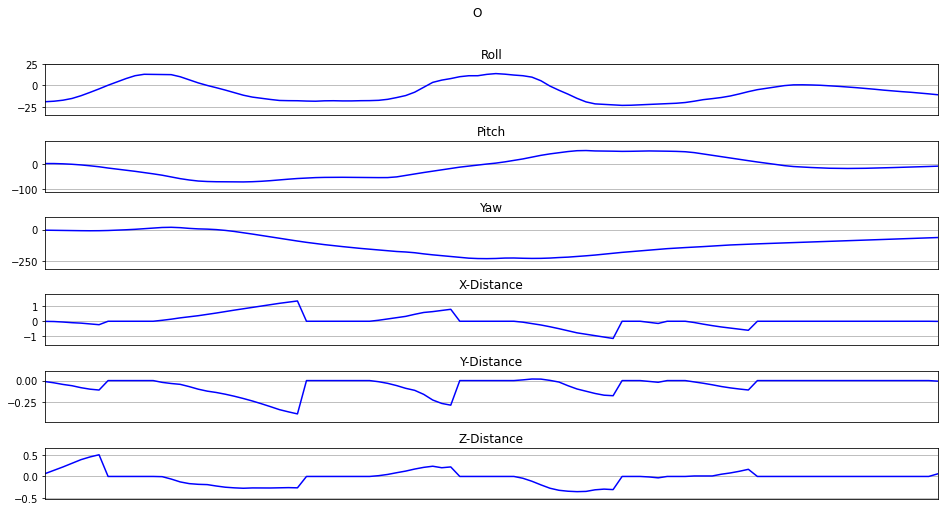

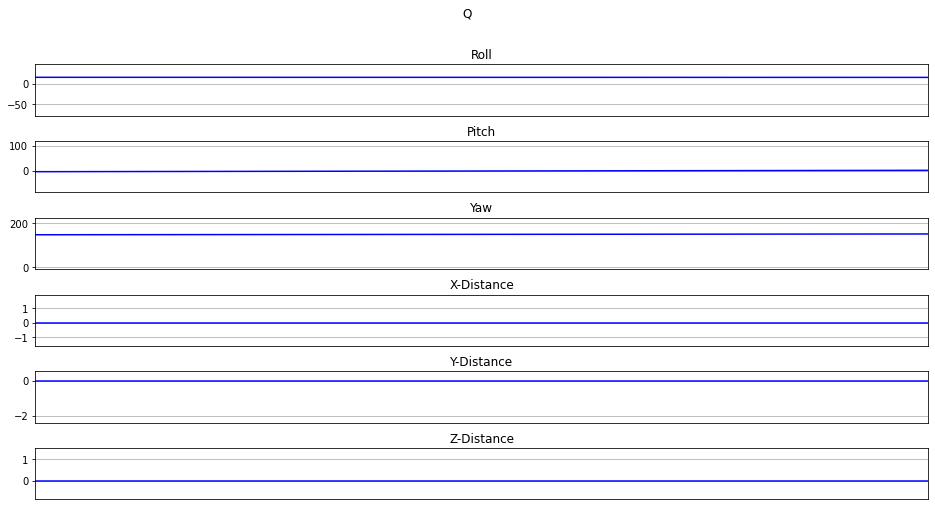

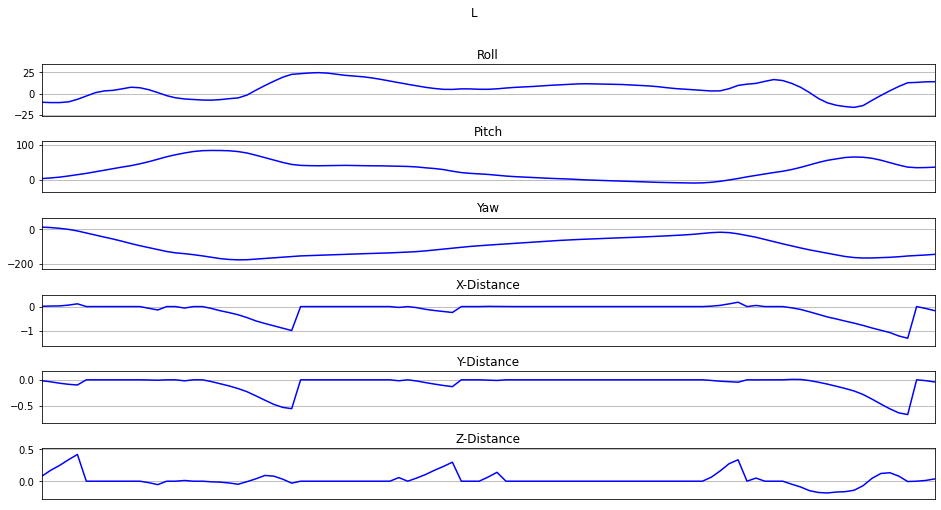

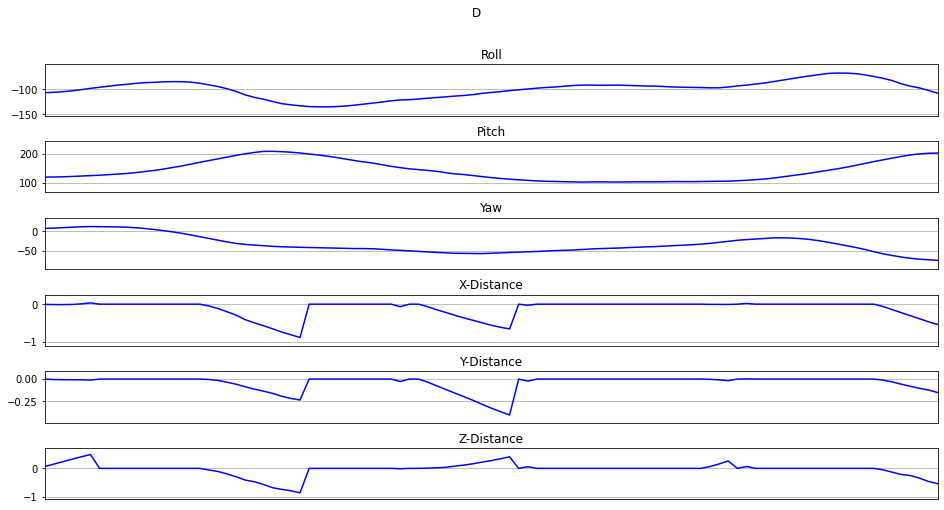

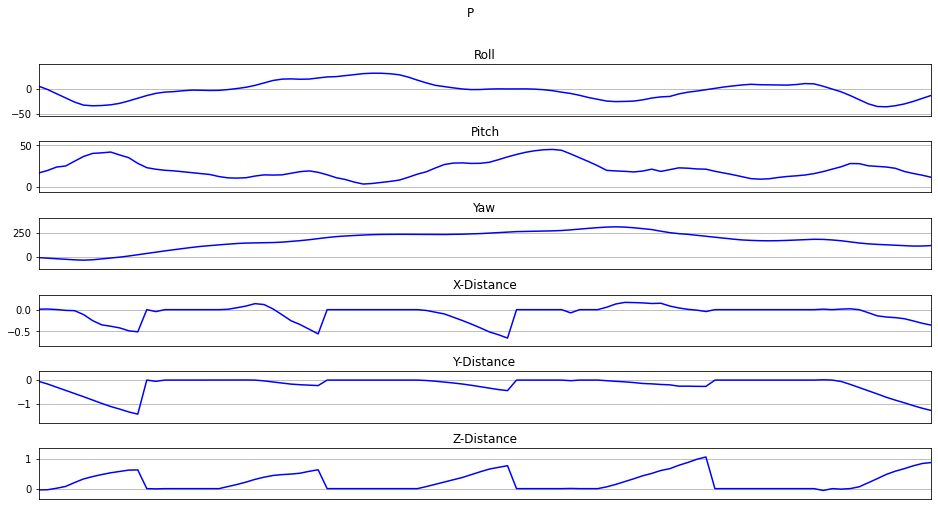

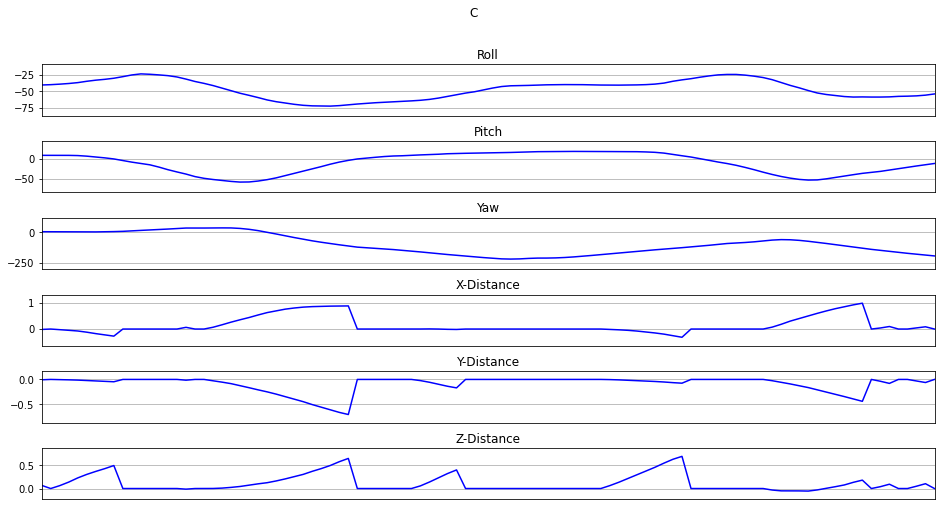

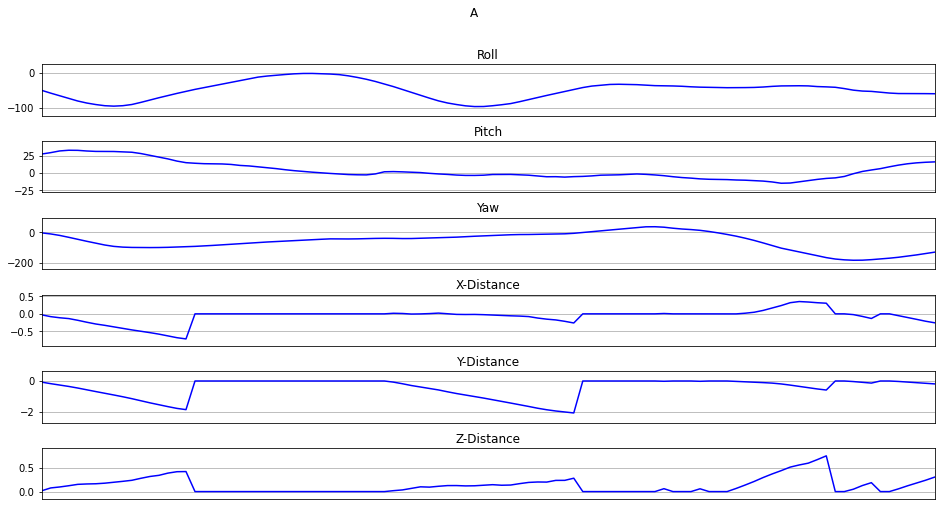

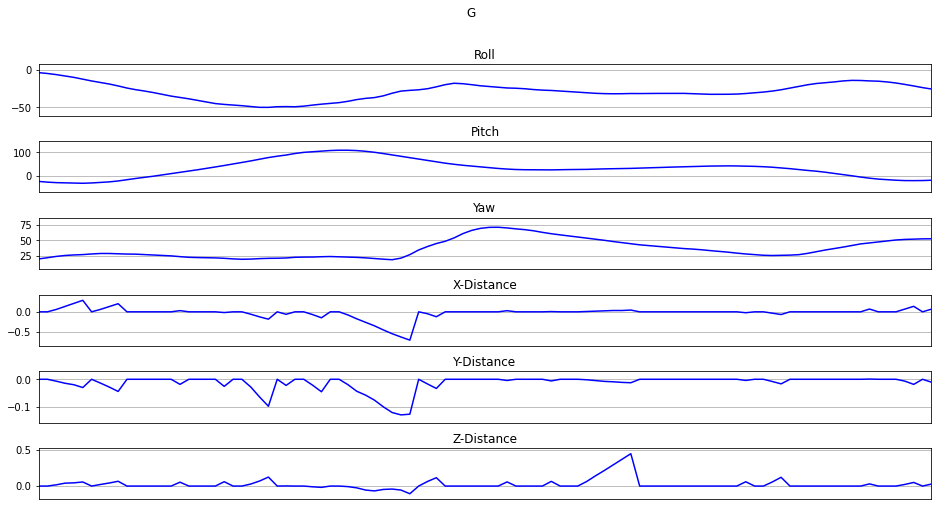

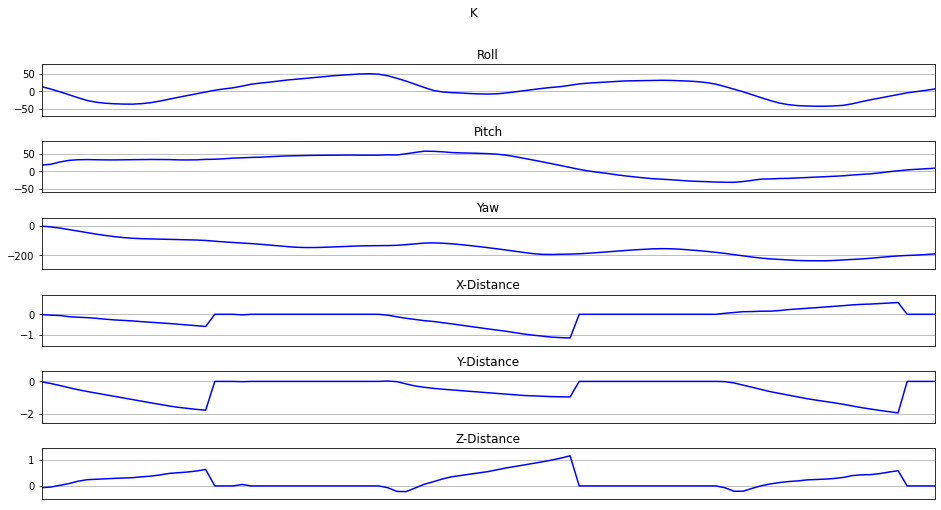

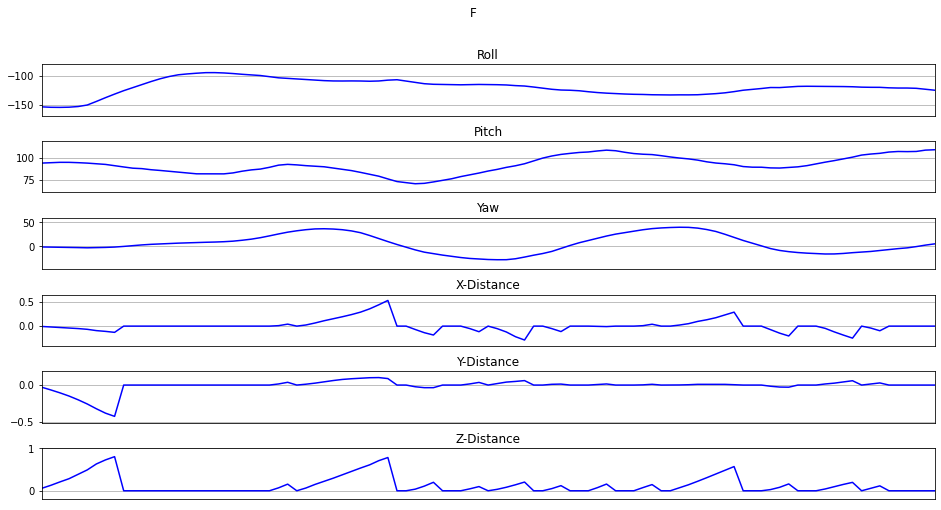

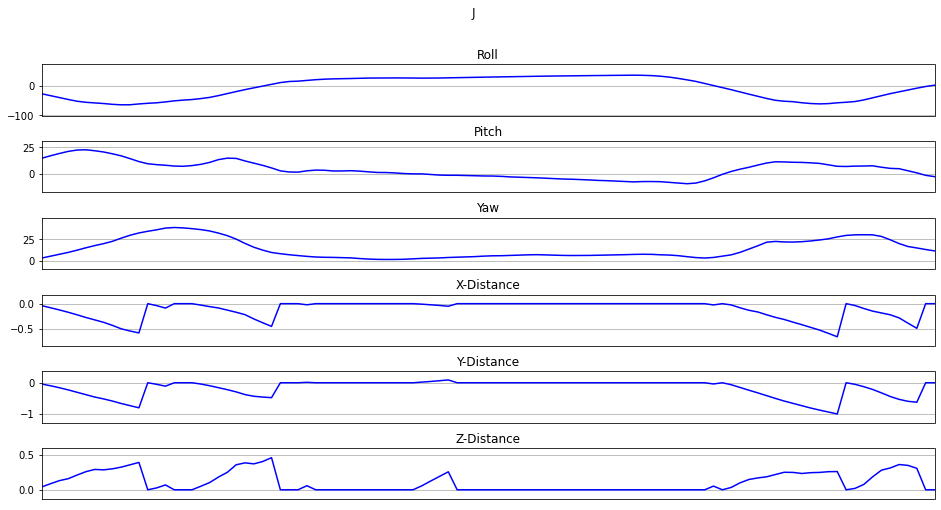

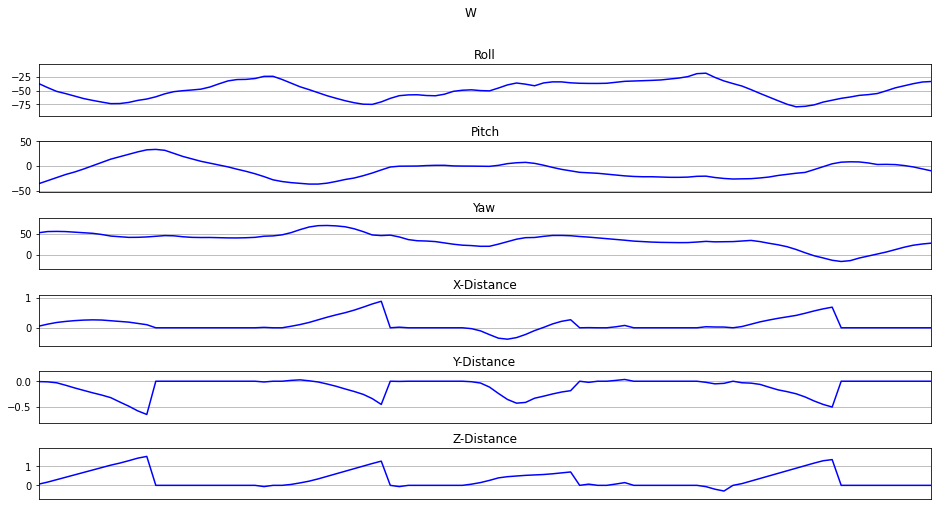

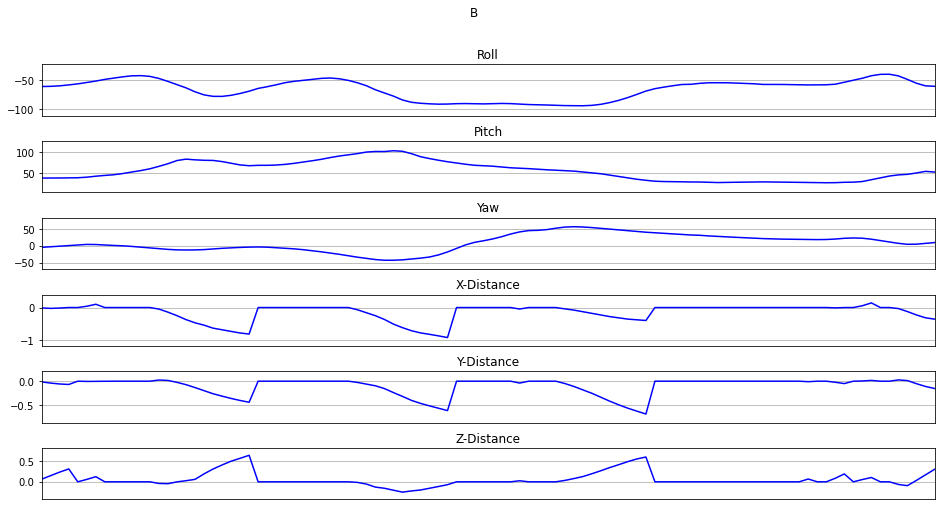

In [15]:
for letter in letters:
    data_for_plot = database[(database['letter'] == letter)][:Fs*3]
    plot_letters(letter, data_for_plot)

In [16]:
database = database.drop(['process', 'time'], axis = 1)

In [17]:
##Balancing the database so that each letter has the same number of data snippets

In [18]:
database['letter'].value_counts()

X    14729
Y    13732
E    13455
M    13270
R    13098
H    13064
Z    13039
U    12960
S    12507
I    12499
V    12468
T    12426
N    12239
O    12209
Q    12156
L    12104
D    12028
P    11994
C    11944
A    11872
G    11817
K    11792
F    11742
J    11709
W    11684
B    11662
Name: letter, dtype: int64

In [19]:
A = database[database['letter']=='A'].head(11662).copy()
B = database[database['letter']=='B'].head(11662).copy()
C = database[database['letter']=='C'].head(11662).copy()
D = database[database['letter']=='D'].head(11662).copy()
E = database[database['letter']=='E'].head(11662).copy()
F = database[database['letter']=='F'].head(11662).copy()
G = database[database['letter']=='G'].head(11662).copy()
H = database[database['letter']=='H'].head(11662).copy()
I = database[database['letter']=='I'].head(11662).copy()
J = database[database['letter']=='J'].head(11662).copy()
K = database[database['letter']=='K'].head(11662).copy()
L = database[database['letter']=='L'].head(11662).copy()
M = database[database['letter']=='M'].head(11662).copy()
N = database[database['letter']=='N'].head(11662).copy()
O = database[database['letter']=='O'].head(11662).copy()
Z = database[database['letter']=='Z'].head(11662).copy()
P = database[database['letter']=='P'].head(11662).copy()
R = database[database['letter']=='R'].head(11662).copy()
S = database[database['letter']=='S'].head(11662).copy()
U = database[database['letter']=='U'].head(11662).copy()
Y = database[database['letter']=='Y'].head(11662).copy()
V = database[database['letter']=='V'].head(11662).copy()
T = database[database['letter']=='T'].head(11662).copy()
X = database[database['letter']=='X'].head(11662).copy()
Q = database[database['letter']=='Q'].head(11662).copy()
W = database[database['letter']=='W'].head(11662).copy()

In [20]:
database = pd.DataFrame()
database = database.append([A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, Z, P, R, S, U, Y, V, T, X, Q, W])

In [21]:
##Labeling classes

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
classes = LabelEncoder()
database['classes'] = classes.fit_transform(database['letter'])
inputs = database[['roll', 'pitch', 'yaw', 'x-distance', 'y-distance', 'z-distance']]
outputs = database['classes']
database.head()

,letter,roll,pitch,yaw,x-distance,y-distance,z-distance,classes
0,A,-49.893414,27.192217,-4.095078,-0.028583,-0.073575,0.016961,0
1,A,-49.893414,27.192217,-4.095078,-0.028583,-0.073575,0.016961,0
2,A,-57.877670,29.199154,-11.091557,-0.080323,-0.173671,0.077316,0
3,A,-65.435219,31.655851,-20.754364,-0.112852,-0.262297,0.097649,0
4,A,-65.435219,31.655851,-20.754364,-0.112852,-0.262297,0.097649,0


In [24]:
classes.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [25]:
##Normalizing the data of every letter using StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)
scaled_inputs = pd.DataFrame(data = inputs, columns = ['roll', 'pitch', 'yaw', 'x-distance', 'y-distance', 'z-distance'])
scaled_inputs['classes'] = outputs.values
scaled_inputs.head()

,roll,pitch,yaw,x-distance,y-distance,z-distance,classes
0,0.243898,-0.185169,-0.38363,0.107873,0.336187,-0.367233,0
1,0.243898,-0.185169,-0.38363,0.107873,0.336187,-0.367233,0
2,0.146693,-0.167616,-0.41281,-0.044520,0.089480,-0.185673,0
3,0.054683,-0.146130,-0.45311,-0.140329,-0.128957,-0.124508,0
4,0.054683,-0.146130,-0.45311,-0.140329,-0.128957,-0.124508,0


In [28]:
##Extracting the frames from the data rows

In [29]:
import scipy.stats as stats

In [30]:
FrameSize = 100
HopSize = 50

In [31]:
def extract_frames(database, FrameSize, HopSize):
    
    frames = []
    outputs = []
    for i in range(0, len(database) - FrameSize, HopSize):
        roll = database['roll'].values[i: i + FrameSize]
        pitch = database['pitch'].values[i: i + FrameSize]
        yaw = database['yaw'].values[i: i + FrameSize]
        x_distance = database['x-distance'].values[i: i + FrameSize]
        y_distance = database['y-distance'].values[i: i + FrameSize]
        z_distance = database['z-distance'].values[i: i + FrameSize]
        output = stats.mode(database['classes'][i: i + FrameSize])[0][0]
        frames.append([roll, pitch, yaw, x_distance, y_distance, z_distance])
        outputs.append(output)
    
    return frames, outputs

In [32]:
inputs, outputs = extract_frames(scaled_inputs, FrameSize, HopSize)

In [33]:
#Reshaping the arrays
inputs = np.asarray(inputs).reshape(-1, FrameSize, 6)
outputs = np.asarray(outputs)

In [34]:
inputs.shape, outputs.shape

((6063, 100, 6), (6063,))

In [35]:
##Separating the data into the train and test set

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size = 0.3, random_state = 0, stratify = outputs)

In [38]:
inputs_train.shape, inputs_test.shape

((4244, 100, 6), (1819, 100, 6))

In [39]:
#Since we need to pass a 3D inputs_train[0].shape
inputs_train = inputs_train.reshape(4244, 100, 6, 1)
inputs_test = inputs_test.reshape(1819, 100, 6, 1)

In [40]:
##Defining the 2D convolutional network and training it

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [42]:
def CreateNeuralModel(num_out, num_mid1, num_mid2, num_drop1, num_drop2, num_drop3, num_filt1, num_filt2, wind_size1, wind_size2):
    model = Sequential()
    model.add(Conv2D(num_filt1, wind_size1, activation = 'relu', input_shape = inputs_train[0].shape))
    model.add(Dropout(num_drop1))
    model.add(Conv2D((num_filt2), wind_size2, activation = 'relu'))
    model.add(Dropout(num_drop3))
    model.add(Flatten())
    model.add(Dense(num_mid1, activation = 'relu'))
    model.add(Dense(num_mid2, activation = 'relu'))
    model.add(Dropout(num_drop2))
    model.add(Dense(num_out, activation = 'sigmoid'))
    return model

In [47]:
def TrainNeuralNetwork (model):
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    learning = model.fit(inputs_train, outputs_train, epochs = 10, validation_data = (inputs_test, outputs_test), verbose = 1)
    return model, learning

In [48]:
##Tuning the hyperparameters

In [64]:
oldBest = 0
best_num_mid1 = 0
best_num_mid2 = 0
best_num_drop1 = 0
best_num_drop2 = 0
num_mid1 = [100, 200]
num_mid2 = [100, 200]
num_drop1 = [0.2, 0.5]
num_drop2 = [0.2, 0.5]

for i in num_mid1:
    for j in num_mid2:
        for k in num_drop1:
            for l in num_drop2:
                model = CreateNeuralModel(26, i, j, k, l, 0.2, 16, 32, [3,3], [2,2])
                model, learning = TrainNeuralNetwork(model)
                newBest = ((learning.history['accuracy'][9] + learning.history['val_accuracy'][9])/2)*learning.history['val_accuracy'][9]
                if(newBest > oldBest):
                    best_num_mid1 = i
                    best_num_mid2 = j
                    best_num_drop1 = k
                    best_num_drop2 = l
                    oldBest = newBest

Train on 4244 samples, validate on 1819 samples
Epoch 1/10
4244/4244 [==============================] - 7s 2ms/sample - loss: 1.6564 - accuracy: 0.4854 - val_loss: 0.6191 - val_accuracy: 0.7850
Epoch 2/10
4244/4244 [==============================] - 6s 1ms/sample - loss: 0.6588 - accuracy: 0.7844 - val_loss: 0.4191 - val_accuracy: 0.8422
Epoch 3/10
4244/4244 [==============================] - 5s 1ms/sample - loss: 0.4198 - accuracy: 0.8537 - val_loss: 0.3247 - val_accuracy: 0.9054
Epoch 4/10
4244/4244 [==============================] - 5s 1ms/sample - loss: 0.2944 - accuracy: 0.8940 - val_loss: 0.2511 - val_accuracy: 0.9164
Epoch 5/10
4244/4244 [==============================] - 5s 1ms/sample - loss: 0.2666 - accuracy: 0.9088 - val_loss: 0.2226 - val_accuracy: 0.9230
Epoch 6/10
4244/4244 [==============================] - 6s 1ms/sample - loss: 0.2066 - accuracy: 0.9265 - val_loss: 0.2421 - val_accuracy: 0.9318
Epoch 7/10
4244/4244 [==============================] - 7s 2ms/sample - loss

4244/4244 [==============================] - 6s 2ms/sample - loss: 0.1282 - accuracy: 0.9618 - val_loss: 0.1568 - val_accuracy: 0.9604
Epoch 10/10
4244/4244 [==============================] - 6s 1ms/sample - loss: 0.1052 - accuracy: 0.9663 - val_loss: 0.1645 - val_accuracy: 0.9472
Train on 4244 samples, validate on 1819 samples
Epoch 1/10
4244/4244 [==============================] - 8s 2ms/sample - loss: 2.1829 - accuracy: 0.3351 - val_loss: 0.9472 - val_accuracy: 0.7125
Epoch 2/10
4244/4244 [==============================] - 6s 2ms/sample - loss: 1.0776 - accuracy: 0.6654 - val_loss: 0.4766 - val_accuracy: 0.8439
Epoch 3/10
4244/4244 [==============================] - 6s 2ms/sample - loss: 0.7200 - accuracy: 0.7663 - val_loss: 0.3905 - val_accuracy: 0.8741
Epoch 4/10
4244/4244 [==============================] - 6s 2ms/sample - loss: 0.5035 - accuracy: 0.8384 - val_loss: 0.2651 - val_accuracy: 0.9192
Epoch 5/10
4244/4244 [==============================] - 6s 2ms/sample - loss: 0.3870 -

In [65]:
##Using the best hyperparameters to train the neural network

In [66]:
model = CreateNeuralModel(26, best_num_mid1, best_num_mid2, best_num_drop1, best_num_drop2, 0.2, 16, 32, [3,3], [2,2])
model, learning = TrainNeuralNetwork(model)

Train on 4244 samples, validate on 1819 samples
Epoch 1/10
4244/4244 [==============================] - 7s 2ms/sample - loss: 1.4213 - accuracy: 0.5511 - val_loss: 0.5552 - val_accuracy: 0.8230
Epoch 2/10
4244/4244 [==============================] - 5s 1ms/sample - loss: 0.5050 - accuracy: 0.8311 - val_loss: 0.3297 - val_accuracy: 0.8966
Epoch 3/10
4244/4244 [==============================] - 6s 1ms/sample - loss: 0.3043 - accuracy: 0.8956 - val_loss: 0.2708 - val_accuracy: 0.9126
Epoch 4/10
4244/4244 [==============================] - 6s 1ms/sample - loss: 0.2181 - accuracy: 0.9227 - val_loss: 0.2082 - val_accuracy: 0.9467
Epoch 5/10
4244/4244 [==============================] - 6s 1ms/sample - loss: 0.1615 - accuracy: 0.9430 - val_loss: 0.1912 - val_accuracy: 0.9450
Epoch 6/10
4244/4244 [==============================] - 6s 1ms/sample - loss: 0.1391 - accuracy: 0.9515 - val_loss: 0.2011 - val_accuracy: 0.9373
Epoch 7/10
4244/4244 [==============================] - 5s 1ms/sample - loss

In [67]:
def PlotAccuracy(learning, epochs):
    learning_range = range(1, epochs+1)
    plt.plot(learning_range, learning.history['accuracy'], color='black')
    plt.plot(learning_range, learning.history['val_accuracy'], color='red')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

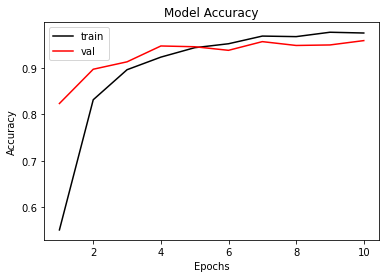

In [68]:
PlotAccuracy(learning, 10)

In [69]:
def PlotLoss(learning, epochs):
    learning_range = range(1, epochs+1)
    plt.plot(learning_range, learning.history['loss'], color='black')
    plt.plot(learning_range, learning.history['val_loss'], color='red')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

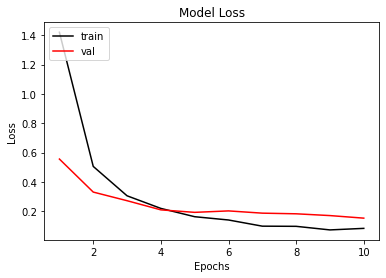

In [70]:
PlotLoss(learning, 10)

In [71]:
##Plotting Confusion Matrix

In [72]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 1440x1440 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

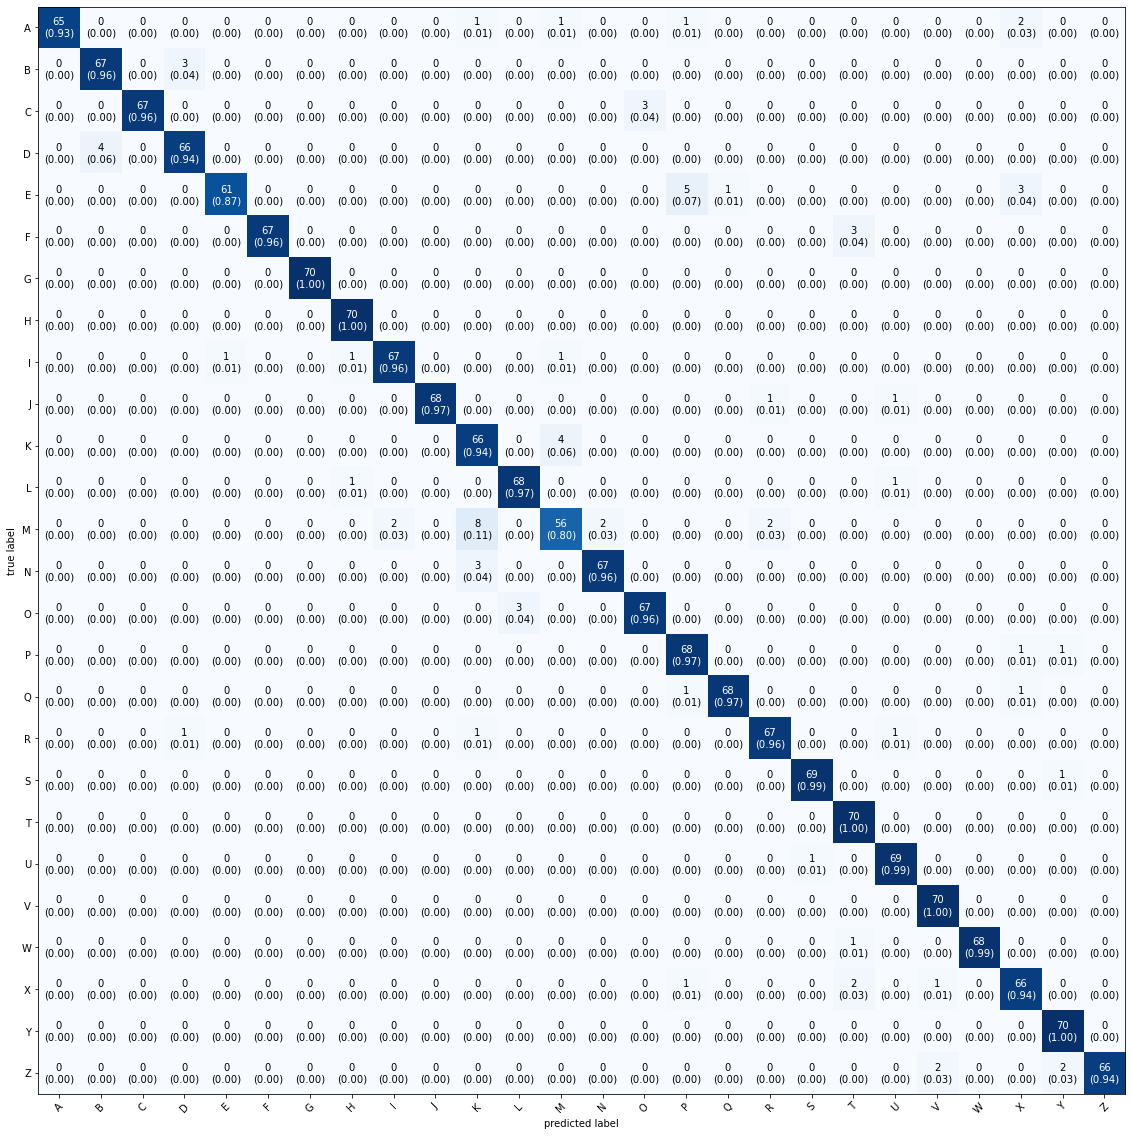

In [73]:
outputs_predicted = model.predict_classes(inputs_test)
confussion_mat = confusion_matrix(outputs_test, outputs_predicted)
plot_confusion_matrix(conf_mat = confussion_mat, class_names = classes.classes_, show_normed = True, figsize = (20,20))